# Document Classification Pipeline

In [1]:
import psutil
import os
from pytictoc import TicToc
from documentProcessor import UnsupervisedDocumentAnalyzer, processAllDocuments, fetchFiles, getLogger, readTifFile

logger = getLogger()
t = TicToc()
core_constraint = [2, 3, 4, 5, 6, 7]
psutil.Process(os.getpid()).cpu_affinity(core_constraint)
logger.debug(f"Initializing Document Classification Pipeline")
logger.info(f"CPU affinity set to cores {core_constraint}")

c:\Users\sayalat\Documents\OCR\documentProcessor.py:87: SyntaxWarning: invalid escape sequence '\d'
  """ date_pattern = r'\d{2}-\d{2}-\d{4}' # DD-MM-YYYY
2024-07-08 15:20:46,490 - DEBUG - Initializing Document Classification Pipeline
2024-07-08 15:20:46,492 - INFO - CPU affinity set to cores [2, 3, 4, 5, 6, 7]


In [2]:
readTifFile("data/testDir/00CB742F.TIF")

'© 04-29-2024 9:33 AM (425) 903-3168\n\n\\ X\n\nvist\n\nBothell Capstone Clinic\n\n24118 Bothell Everett Hwy Ste 400\nBothell WA\n\n98021 (425) 903-3168 (425) 686-7485\n\nComment: Stephen Elf\n\n~ 14258927580\n\n| o: Kelly B. Weaver MD\nFax number: (425) 892-7580\n\nFrom: Tsukjum Chila\nFax number: (425) 903-3168\n\nDate: 04-29-24\nRegarding : Stephen Elf\n\nIDOB: 10-29-1955\n\nPhone number for follow-up:\n(425) 686-7485\n\nWe have been reviewing our charts and noticed we are missing the certification of care for this patient.\nWe are requesting this be signed and faxed back at your earliest convenience in order to comply with\nMedicare guidelines, Thank you for your assistance,\n\npg lof3\n\n © 04-29-2024 9:33 AM (425) 903-3168 ~ 14258927580 pg 2 of 3\n\nPatient: Stephen Elf\n\nPHYSICAL THERAPY PLAN OF CARE\n\nDate of Visit: 04-16-24 Referral Source: Kathleen Weaver, ARNP\nPatient Name: Stephen Elf Date of Onset:\n\nPatient Number: 50949 Certification Period: 04-16-24 - 05-06-24\nDate

In [3]:
labels = [
  'plan of care', 'prescription request', 'progress note',
  'prescription authorization', 'lab results', 'result notification',
  'formal records request', 'patient chart note', 'return to work',
  'spam', 'other'
]

analyzer = UnsupervisedDocumentAnalyzer()
logger.info('UnsupervisedDocumentAnalyzer initialized')

2024-07-08 15:21:05,500 - INFO - UnsupervisedDocumentAnalyzer initialized


In [4]:
folder = 'testDir' # Set the folder to process

directory = 'data/' + folder + '/'
tif_files = fetchFiles(directory)

t.tic()
logger.info(f'Starting document processing for {len(tif_files)} files in {directory}')
results_df = processAllDocuments(tif_files, analyzer, labels)
elapsed_time = t.tocvalue()
logger.info(f'Finished document processing for {len(tif_files)} files in {directory}. Time taken: {elapsed_time:.2f} seconds.')

2024-07-08 15:21:05,514 - INFO - Found 15 TIF files in directory: data/testDir/
2024-07-08 15:21:05,516 - INFO - Starting document processing for 15 files in data/testDir/
2024-07-08 15:21:05,517 - INFO - Starting to process 15 documents in 1 batches
2024-07-08 15:21:05,518 - INFO - Processing batch 1/1
2024-07-08 15:22:15,528 - DEBUG - Processed document: data/testDir/00C9EACF.TIF (Status: success)
2024-07-08 15:22:47,692 - DEBUG - Processed document: data/testDir/00C93BC3.TIF (Status: success)
2024-07-08 15:22:56,176 - DEBUG - Processed document: data/testDir/00C92E5C.TIF (Status: success)
2024-07-08 15:23:05,388 - DEBUG - Processed document: data/testDir/00C9EC13.TIF (Status: success)
2024-07-08 15:23:20,122 - DEBUG - Processed document: data/testDir/00CB4846.TIF (Status: success)
2024-07-08 15:23:47,472 - DEBUG - Processed document: data/testDir/00C9FFCD.TIF (Status: success)
2024-07-08 15:24:04,182 - DEBUG - Processed document: data/testDir/00CB5775.TIF (Status: success)
2024-07-0

In [5]:
print(f'Total documents processed: {len(results_df)}')
print(f'Successfully processed: {results_df['status'].value_counts().get("success", 0)}')
print(f'Failed to process: {results_df['status'].value_counts().get("error", 0)}')

print(f'Category distribution:')
print(results_df[results_df['status'] == 'success']['category'].value_counts())

print(f'Average confidence: {results_df[results_df['status'] == 'success']['confidence'].mean():.2f}')

Total documents processed: 15
Successfully processed: 15
Failed to process: 0
Category distribution:
category
other                   6
result notification     5
prescription request    2
patient chart note      1
plan of care            1
Name: count, dtype: int64
Average confidence: 0.36


In [6]:
if 'error' in results_df['status'].values:
  print('\nError Analysis:')
  error_df = results_df[results_df['status'] == 'error']
  print(error_df['error_message'].value_counts())

  print('\nFiles with empty extracted text:')
  empty_text_files = error_df[error_df['error_message'] == 'ValueError: Extracted text is empty']
  print(empty_text_files['file_path'].tolist())

  print('\nFiles with other errors:')
  other_error_files = error_df[error_df['error_message'] != 'ValueError: Extracted text is empty']
  for _, row in other_error_files.iterrows():
    print(f'File: {row["file_path"]}')
    print(f'Error: {row["error_message"]}')
    print(f'Extracted text length: {row['text_length']}')
    print()

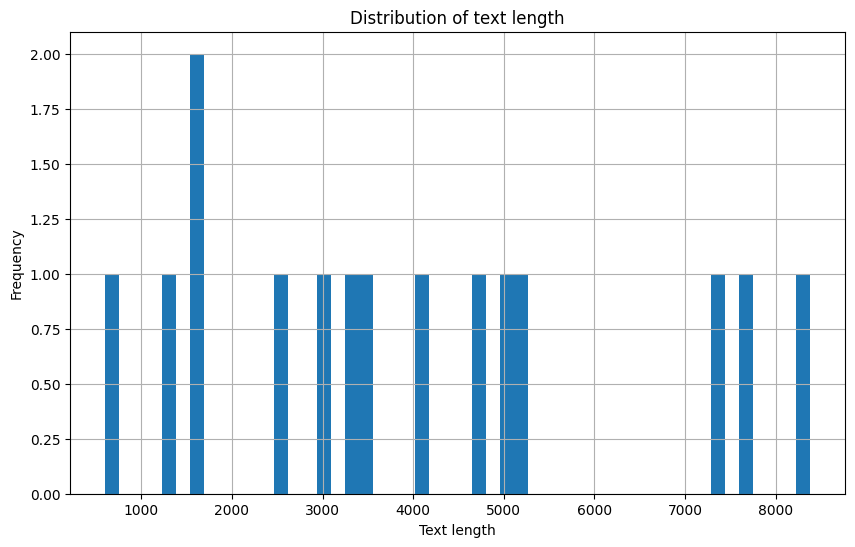

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
results_df['text_length'].hist(bins=50)
plt.title('Distribution of text length')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [8]:
""" results_df.to_csv('documentAnalysisResults.csv', index=False)
logger.info('Results saved to documentAnalysisResults.csv') """

" results_df.to_csv('documentAnalysisResults.csv', index=False)\nlogger.info('Results saved to documentAnalysisResults.csv') "

In [9]:
results_df.head(15)

,file_path,summary,category,confidence,status,error_message,text_length
0,data/testDir/00C9EACF.TIF,"[]\nSummary: Verification allows new, pharmacy...",prescription request,0.434531,success,None,1348
1,data/testDir/00C93BC3.TIF,[]\nSummary: Woodinville Physical Therapy 1700...,result notification,0.290497,success,None,601
2,data/testDir/00C92E5C.TIF,[]\nSummary: The information contained in this...,other,0.363757,success,None,2561
3,data/testDir/00C9EC13.TIF,[]\nSummary: The Everett Clinic Part of Optum ...,result notification,0.461847,success,None,3375
4,data/testDir/00CB4846.TIF,"[]\nSummary: Victor Correa, B01 S 50th Ave Yak...",result notification,0.367981,success,None,1640
5,data/testDir/00C9FFCD.TIF,[]\nSummary: The Everett Clinic Part of Optum ...,result notification,0.406196,success,None,3435
6,data/testDir/00CB5775.TIF,[]\nSummary: Serhii Kovalchuk 2 (including cov...,other,0.240900,success,None,2938
7,data/testDir/00CB742F.TIF,© 04-29-2024 9:33 AM (425) 903-3168\n\n\ X\n\n...,patient chart note,0.239419,success,None,4162
8,data/testDir/00CB770F.TIF,B4-29-2824 18:13 PSJH_EPIC BA 1/3\n\nSWEDISH\n...,other,0.211530,success,None,5089
9,data/testDir/00CB7174.TIF,© 04-29-2024 8:32 AM\n\n\ X\n\nMovement PT (Ca...,plan of care,0.661553,success,None,7439


In [10]:
results_df['summary'][7]

'© 04-29-2024 9:33 AM (425) 903-3168\n\n\\ X\n\nvist\n\nBothell Capstone Clinic\n\n24118 Bothell Everett Hwy Ste 400\nBothell WA\n\n98021 (425) 903-3168 (425) 686-7485\n\nComment: Stephen Elf\n\n~ 14258927580\n\n| o: Kelly B. Weaver MD\nFax number: (425) 892-7580\n\nFrom: Tsukjum Chila\nFax number: (425) 903-3168\n\nDate: 04-29-24\nRegarding : Stephen Elf\n\nIDOB: 10-29-1955\n\nPhone number for follow-up:\n(425) 686-7485\n\nWe have been reviewing our charts and noticed we are missing the certification of care for this patient.\nWe are reque... (truncated)'

### Check if a document is referral

In [14]:
def isReferral(text):
  referral_keywords = ['referral to', 'referral communication form', 'end of referral report', 'patient demo']
  return any(keyword in text.lower() for keyword in referral_keywords)

In [15]:
""" def summarize(self, text):
    try:
      if not text or len(text) < 30:
        logger.warning(f'Text length is less than 30 characters. Skipping summarization')
        return text
      
      max_tokens = self.summarizer.tokenizer.model_max_length - 100
      encoded_text = self.summarizer.tokenizer.encode(text, truncation=True, max_length=max_tokens)
      decoded_text = self.summarizer.tokenizer.decode(encoded_text, skip_special_tokens=True)
      logger.debug(f'Attempting to summarize text of length {len(decoded_text)}')

      chunk_size = 1024
      chunks = [decoded_text[i:i+chunk_size] for i in range(0, len(decoded_text), chunk_size)]

      summaries = []
      for chunk in chunks:
        chunk_summary = self.summarizer(chunk, max_length=150, min_length=30, do_sample=False)
        summaries.append(chunk_summary[0]['summary_text'])

      final_summary = " ".join(summaries)
      if len(final_summary.split()) > 150:
        final_summary = self.summarizer(final_summary, max_length=150, min_length=30, do_sample=False)[0]['summary_text']

      logger.debug(f'Summary successful. Summary length: {len(final_summary)} characters')
      return final_summary
    
    except Exception as e:
      logger.error(f'Error in summarization: {str(e)}')
      return text """

' def summarize(self, text):\n    try:\n      if not text or len(text) < 30:\n        logger.warning(f\'Text length is less than 30 characters. Skipping summarization\')\n        return text\n      \n      max_tokens = self.summarizer.tokenizer.model_max_length - 100\n      encoded_text = self.summarizer.tokenizer.encode(text, truncation=True, max_length=max_tokens)\n      decoded_text = self.summarizer.tokenizer.decode(encoded_text, skip_special_tokens=True)\n      logger.debug(f\'Attempting to summarize text of length {len(decoded_text)}\')\n\n      chunk_size = 1024\n      chunks = [decoded_text[i:i+chunk_size] for i in range(0, len(decoded_text), chunk_size)]\n\n      summaries = []\n      for chunk in chunks:\n        chunk_summary = self.summarizer(chunk, max_length=150, min_length=30, do_sample=False)\n        summaries.append(chunk_summary[0][\'summary_text\'])\n\n      final_summary = " ".join(summaries)\n      if len(final_summary.split()) > 150:\n        final_summary = self